# Prueba Intertrimestral

Nombre y Apellidos:

Tiempo de la prueba: 1h y 45 mins

Asignatura: Desarrollo de Aplicaciones para la Visualización de Datos

Fecha: 14 de octubre de 2024

Instrucciones:

- Herramientas Sugeridas: Python (pandas, matplotlib, seaborn, scikit-learn).

- Evaluación: Se valorará la capacidad para interpretar los resultados y la claridad en la exposición de las conclusiones.

- Materiales permitidos: Materiales de clase. Internet para búsqueda de dudas y documentación.

- Prohibido: Mingún tipo de LLM, ni mensajería instantánea.

- Formato de Entrega: Los estudiantes deben presentar su trabajo en formato de notebook (por ejemplo, Jupyter Notebook), con gráficos y explicaciones detalladas.

- Entrega: Subir .ipynb y PDF a Github. Enviar resultados al siguiente enlace. Para crear PDF: File -> Print -> Destination as PDF

## [Entrega aquí el examen](https://forms.gle/gU7aKkzE7didZpYV7)




Carga aquí las librerías que creas que vayas a utilizar:

In [175]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from datetime import datetime

# Ejercicio 1: Programación (2 puntos)

a) Crea una función que calcule y devuelva el valor de la iteración $n+1$ del mapa logístico dada la fórmula:

$x_{n+1}=r⋅x_n⋅(1−x_n)$

donde:

- $r$ es la tasa de crecimiento
- $x_n$ es el valor de la iteración anterior.

La función debe aceptar como parámetros $r$ y $x_n$ (valor inicial). (0.6 puntos)


In [35]:
def mapa_logistico(r, x_n):
    return r * x_n * (1 - x_n)

0.04000000000000001

b) Crea una función que genere una lista con las primeras n iteraciones del mapa logístico, utilizando la función anterior. (0.6 puntos)

In [38]:
def iteraciones_mapa_logistico(r, x_0, n):
    iteraciones = [x_0]
    for i in range(n):
        x_n = mapa_logistico(r, iteraciones[i])
        iteraciones.append(x_n)
    return iteraciones

c) Guarda en un dataframe las iteraciones del mapa logístico, para $r = \{0, 0.25, 0.5, 0.75, \dots, 4\}$ y semilla $x_0 = 0.2$. El dataframe debe tener tres columnas: $r$, $n$ y $x_{n+1}$. Muestra los 10 primeros resultados (0.6 puntos)

In [43]:
r_values = [i/4 for i in range(17)][1:] #Vamos a quitar el 0
x_0 = 0.2
n = 10

df = pd.DataFrame(columns=['r', 'n', 'x_n+1'])
i=0
for r in r_values:
    df.loc[i] = [r,i,mapa_logistico(r,x_0)]
    x_0 = mapa_logistico(r,x_0)
    i += 1

#Plot first 10
df.head(10)



,r,n,x_n+1
0,0.25,0.0,0.040000
1,0.50,1.0,0.019200
2,0.75,2.0,0.014124
3,1.00,3.0,0.013924
4,1.25,4.0,0.017163
5,1.50,5.0,0.025302
6,1.75,6.0,0.043159
7,2.00,7.0,0.082592
8,2.25,8.0,0.170483
9,2.50,9.0,0.353547


d) ¿Cómo se podría programar en una clase las dos funciones anteriores para calcular y almacenar iteraciones del mapa logístico? Proporciona la implementación de la clase con un método para obtener el valor de una iteración específica, otro método para generar la lista completa de iteraciones y otro para crear un gráfico que visualice el $r$ y $x_{n+1}$. (0.2 puntos)

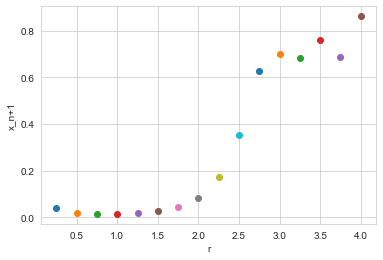

In [75]:
class MapaLogistico:
    def __init__(self,df):
        self.df = df
        
    
    def mapa_logistico(self,r,x_0):
        return r * x_0 * (1 - x_0)

    def iteraciones_mapa_logistico(self,r,x_0,n):
        iteraciones = [x_0]
        for i in range(self.n):
            x_n = mapa_logistico(r, iteraciones[i])
            iteraciones.append(x_n)
        return iteraciones
    
    def grafico(self):
        print()
        for i in range(self.df.shape[0]):
            plt.scatter(self.df.iloc[i][0],self.df.iloc[i][2])
        plt.xlabel('r')
        plt.ylabel('x_n+1')
        plt.show()
        
    def get_iteraciones(self):
        return  self.iteraciones
        

mapa = MapaLogistico(df)
mapa.grafico()
    

# Ejercicio 2: Exploración y comprensión (3 puntos)

a) Describe las principales variables del dataset proporcionado. ¿Qué información aportan y qué tipo de datos contiene cada una? ¿Existen valores faltantes en el dataset? Si es así, ¿en qué variables? ¿Qué propones para resolverlo? (1 puntos)


In [81]:
def basicStats(df):
  print(df.shape)
  print(df.isna().sum())
  print(df.dtypes)
  print(df.describe(include='all'))

In [80]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,NaN


El dataset proporcionado es un dataset de Walmart que contiene las siguientes variables:

Store-> Id de la store

Data-> Día

Weekly_Sales-> Número de ventas a la semana

Holiday_Flag-> Si es Holiday esa semana

Temperature-> Temperatura promedio

Fuel_Price-> Precio promedio del petroleo

CPI-> Inflación

Unemployment-> Datos de unemployment esa semana

Las variables son de tipo numérico, excepto Date que es de tipo fecha.

Podemos inferir que lo que se busca es a partir de datos macroeconómicos, mediambientales y tipo de semana, estimar el número de ventas esa semana

In [176]:
df = pd.read_csv('Walmart.csv')

basicStats(df)

# En vez de eliminarlo, para que no nos quede un hueco ahí vamos a añadirlo con la media de todos los Unemployments
df['Unemployment'] = df['Unemployment'].fillna(df['Unemployment'].mean())
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, '%d-%m-%Y'))
basicStats(df)


(6435, 8)
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    1
dtype: int64
Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object
              Store        Date  Weekly_Sales  Holiday_Flag  Temperature  \
count   6435.000000        6435  6.435000e+03   6435.000000  6435.000000   
unique          NaN         143           NaN           NaN          NaN   
top             NaN  05-02-2010           NaN           NaN          NaN   
freq            NaN          45           NaN           NaN          NaN   
mean      23.000000         NaN  1.046965e+06      0.069930    60.663782   
std       12.988182         NaN  5.643666e+05      0.255049    18.444933   
min        1.000000         NaN  2.099862e+05      0.000000    -2.060000   
25%       12.000000

/var/folders/j8/fmdplvyd6zd5tb1hm29gtcgc0000gn/T/ipykernel_36376/2016406142.py:5: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



b) Realiza un gráfico de barras que responda las siguientes preguntas. ¿Cuántas tiendas $Store$ están presentes en el dataset? ¿Cuál es la media de ventas semanales $Weekly Sales$ por tienda? ¿Qué tiendas tienen las ventas promedio más altas y más bajas? (1 puntos)

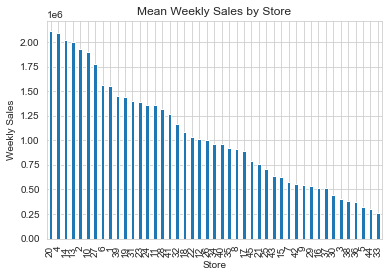

In [177]:
df_stores = df.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False)
df_stores.plot(kind='bar')
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.title('Mean Weekly Sales by Store')
plt.show()

c) Genera un gráfico de líneas que muestre la evolución de las ventas semanales $Weekly Sales$ a lo largo del tiempo para la tienda con más ventas totales. ¿Observas algún patrón estacional o tendencia? (1 puntos)

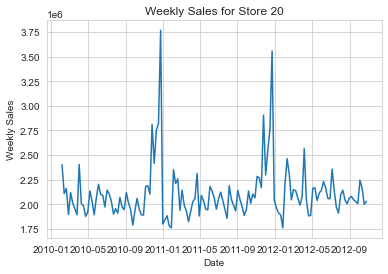

In [201]:
df = pd.read_csv('Walmart.csv')
df['Unemployment'] = df['Unemployment'].fillna(df['Unemployment'].mean())
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, '%d-%m-%Y'))

df_store_max_sales = df[df['Store'] == df_stores.idxmax()] # Es la tienda Número 20
# There are too many date in the ylabel, we can change it to month
plt.plot(df[df['Store']==20]['Date'],df[df['Store']==20]['Weekly_Sales'])
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales for Store 20')
plt.show()

fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x = df[df['Store']==20]['Date'],
        y = df[df['Store']==20]['Weekly_Sales'],
        mode='lines'
    )
)


# Se puede observar como las fechas cercanas a los festivos hay un aumento en las ventas significativo. También podemos observar una componente estacional en las ventas, con un periodo de 12 meses.

# Ejrcicio 3: Análisis de Factores Externos (2 puntos)

a) Explora la relación entre el precio de combustible $Fuel Price$, la tasa de desempleo $Unemployment$ y las ventas semanales $Weekly Sales$. ¿Existe alguna correlación significativa? Genera dos gráficos de dispersión (scatter plot) para ilustrarlo. (1 puntos)

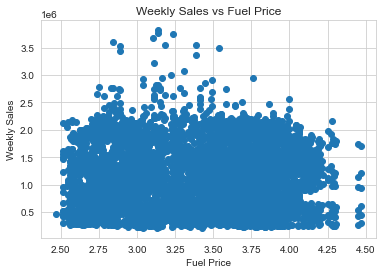

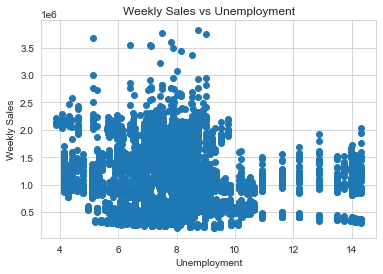

In [203]:
plt.scatter(df['Fuel_Price'], df['Weekly_Sales'])
plt.xlabel('Fuel Price')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales vs Fuel Price')
plt.show()


plt.scatter(df['Unemployment'], df['Weekly_Sales'])
plt.xlabel('Unemployment')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales vs Unemployment')
plt.show()
#Doing the same but with plotly

fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x = df['Fuel_Price'],
        y = df['Weekly_Sales'],
        mode='markers'
    )
)

fig.update_xaxes(title_text = "Fuel Price")
fig.update_yaxes(title_text = "Weekly Sales",)

# Se puede observar como en el caso de Unemployment si, cuandoo más hay menos ventas semanales se pueden observar.
# En el caso de Fuel Price no se puede ver a primera vista, pero sí que vemso que cuando sube un poco si hay más ventas, esto puede ser porque Walmart suele ser como COstco y oferecen gasolineras cerca a menor precio. Y uan vez la gente ya está ahí compra. 

c) Compara las ventas promedio de las semanas festivas $Holiday Flag = 1$ con las semanas no festivas $Holiday Flag = 0$. ¿Cuál es la diferencia promedio de ventas entre estos dos tipos de semanas? ¿Existe una diferencia estdísticamente significativa? (1 puntos)


In [198]:
df_holiday = df.groupby('Holiday_Flag')['Weekly_Sales'].mean()
df_holiday


print(f"Diferencia promedio es de {df_holiday[1] - df_holiday[0]}")

if stats.ttest_ind(df[df['Holiday_Flag']==1]['Weekly_Sales'],df[df['Holiday_Flag']==0]['Weekly_Sales'])[1] < 0.05:
  print('Hay una diferencia estadística entre los días que es festivo y los que no.')
else:
  print('There is no significant difference between the two groups.')

Diferencia promedio es de 81577.51300729357
Hay una diferencia estadística entre los días que es festivo y los que no.


# Ejercicio 4: Modelado predictivo (2 puntos)

a) Encuentra el mejor modelo de regresión lineal para predecir las ventas semanales $Weekly Sales$ en función de las variables disponibles. Prueba múltiples combinaciones de variables. (1.5 puntos)


In [196]:
df = pd.read_csv('Walmart.csv')
df = df.dropna(subset=['Unemployment'])


X = np.array(df.drop(['Weekly_Sales','Date'], axis=1))
y = np.array(df['Weekly_Sales'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
reg = LinearRegression().fit(X_train, y_train)

linear_r2=round(reg.score(X_test, y_test),2)
print("Variance explanation R^2 = {}".format(round(reg.score(X_test, y_test),2)))

# Adding date as a feature
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].map(pd.Timestamp.timestamp)
X = np.array(df.drop(['Weekly_Sales'], axis=1))
y = np.array(df['Weekly_Sales'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

reg = LinearRegression().fit(X_train, y_train)
linear_r2_date=round(reg.score(X_test, y_test),2)
print("Variance explanation R^2 with Date = {}".format(round(reg.score(X_test, y_test),2)))

print(reg.coef_)

#Using plotly go
fig = go.Figure()
fig.add_trace(
    go.Bar(
        x = reg.coef_,
        y = df.drop(columns= ['Weekly_Sales'], axis=1).columns,
        orientation='h'
    )
)
fig.show()

X = np.array(df.drop(['Weekly_Sales','Date'], axis=1))
y = np.array(df['Weekly_Sales'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

for i in range(1,6):
    reg = LinearRegression()
    selector = RFE(reg, n_features_to_select=i)
    selector = selector.fit(X_train, y_train)
    print(f"Seleccionando {i}; Variables")
    print("Variance explanation R^2 = {}".format(round(selector.score(X_test, y_test),4)))
    #MSE Error
    print("Mean Squared Error:", mean_squared_error(y_test, selector.predict(X_test)))
    
    

print(df.drop(columns= ['Weekly_Sales','Date'], axis=1).columns[selector.support_])



Variance explanation R^2 = 0.15
Variance explanation R^2 with Date = 0.15
[-1.53351737e+04 -3.55031401e-04  6.23148500e+04 -8.69498494e+02
  2.57405491e+04 -2.28454065e+03 -2.22684223e+04]


/Users/juanvecino/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning:

Parsing '19-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

/Users/juanvecino/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning:

Parsing '26-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

/Users/juanvecino/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning:

Parsing '19-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

/Users/juanvecino/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning:

Parsing '26-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

/Users/juanvecino/opt/anaconda3/lib/python3.9/site-packages/pandas/core/

Seleccionando 1; Variables
Variance explanation R^2 = 0.0034
Mean Squared Error: 313689383519.1964
Seleccionando 2; Variables
Variance explanation R^2 = 0.0024
Mean Squared Error: 314011208820.0683
Seleccionando 3; Variables
Variance explanation R^2 = 0.1234
Mean Squared Error: 275937120758.73065
Seleccionando 4; Variables
Variance explanation R^2 = 0.1246
Mean Squared Error: 275542130215.0257
Seleccionando 5; Variables
Variance explanation R^2 = 0.1507
Mean Squared Error: 267341079609.3106
Index(['Store', 'Holiday_Flag', 'Fuel_Price', 'CPI', 'Unemployment'], dtype='object')


In [208]:
#Quitamos Store y Date al final viene dado por holiday que es lo más importante
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].map(pd.Timestamp.timestamp)
X = np.array(df.drop(['Weekly_Sales','Store'], axis=1))
y = np.array(df['Weekly_Sales'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
reg = LinearRegression().fit(X_train, y_train)

linear_r2=round(reg.score(X_test, y_test),2)
print("Variance explanation R^2 = {}".format(round(reg.score(X_test, y_test),2)))
print("Mean Squared Error:", mean_squared_error(y_test, reg.predict(X_test)))

Variance explanation R^2 = 0.03
Mean Squared Error: 312634232709.39575


b) Compara los modelos evalúando el R² y el error cuadrático medio (MSE). ¿Cuál es el modelo con mejores métricas? (0.5 puntos)


In [ ]:
El modelo con menor MSE y mayor R^2 es el no utiliza las variables de Store y Date(Tampoco Influye se ha probado con ambos casos y el modelo más simple suele ser el que hay que usar). En el caso de date Holiday ya da mucha información y en el caso de Store el número de la store no va correlacionado con un aumento de ventas por lo tanto no tiene sentido añadirlo.

# Ejercicio 5: Conclusiones y Recomendaciones (1 punto)

a) Redacta un informe de máximo 500 palabras resumiendo los principales hallazgos del análisis de datos y la modelización. Incluye tus conclusiones sobre qué factores influyen más en las ventas y recomendaciones para la empresa basadas en el análisis.

In [197]:
Variables más importantes:

A lo largo de este análisis hemos visto que el factor principal para saber el número de ventas en esta semana es si es festivo o no. Aumentando el núemro de ventas en el caso en el que sea festivo.

Otras variables que en un primer momento pensaríamos que son significativas/ apotan mucho valor nos hemso dado cuenta que no como puede ser la temperatura o el CPI

El modelo con menor MSE y mayor R^2 es el no utiliza las variables de Store y Date. En el caso de date Holiday ya da mucha información y en el caso de Store el número de la store no va correlacionado con un aumento de ventas por lo tanto no tiene sentido añadirlo.

Inferencia a través de los gráficos:

Hemos visto que la tineda número 20 es la que más vende, sería optimo diseñar un modelo para cada una de las tiendas para ver como afecat individiualmente a cada una de ellas.

Se puede observar como las fechas cercanas a los festivos hay un aumento en las ventas significativo. También podemos observar una componente estacional en las ventas, con un periodo de 12 meses.

Se puede observar como en el caso de Unemployment si, cuandoo más hay menos ventas semanales se pueden observar.
En el caso de Fuel Price no se puede ver a primera vista, pero sí que vemso que cuando sube un poco si hay más ventas, esto puede ser porque Walmart suele ser como COstco y oferecen gasolineras cerca a menor precio. Y uan vez la gente ya está ahí compra.

SyntaxError: invalid syntax (2825760432.py, line 1)